**logistic regression.ipynb**

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
class LogisticRegression1():
  def __init__(self,lr,iter):
    self.lr=lr
    self.iter=iter
  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.W=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.iter):
        self.update_w()
    return self
  def update_w(self):
      Y_pred=self.predict(self.X)
      h=Y_pred-self.Y.T
      h=np.reshape(h,self.m)
      dW=np.dot(self.X.T, h) /self.m
      db=np.sum(h)/self.m
      self.W = self.W - self.lr*dW
      self.b = self.b - self.lr* db
      return self
  def sigmoid(self,x):
      return 1/(1+np.exp(-x))
  def predict(self,X):
       Z=self.sigmoid(X.dot(self.W)+self.b)
       Y = np.where( Z > 0.5, 1, 0 )
       return Y
  def BCELoss(self,y,y_pred):
        epsilon = 1e-7  # small epsilon value to avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip y_pred to avoid log(0) or log(1)

        loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss
breast_cancer = datasets.load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target
#print(breast_cancer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
breast_cancer1=LogisticRegression1(lr=0.01,iter=1000)
breast_cancer1.fit(X_train,y_train)
y_predict1=breast_cancer1.predict(X_test)
c1 = np.sum(y_predict1==y_test)
c=len(y_test)
print("accuracy ",(c1/c)*100)
entropy_loss = breast_cancer1.BCELoss(y_test,y_predict1)
print(entropy_loss)

accuracy  96.49122807017544
0.5655473123328005


**linearRegression**

real values
 [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]
predicted valuese 
 [ 40594.69280831 123305.17728585  65031.88140395  63152.09766582
 115786.04233334 108266.90738084 116725.9342024   64091.98953488
  76310.5838327  100747.77242834]
9398.918690628763 26496.31477236876


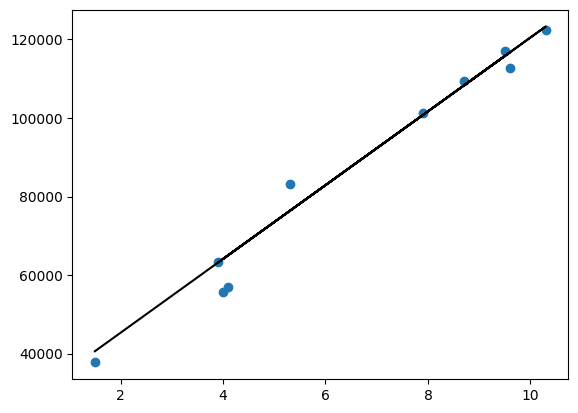

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
class linearRegression():
  def __init__(self,learning_rate,iterations):
    self.learning_rate=learning_rate
    self.iterations=iterations
  def fit(self,X,Y):
    self.m,self.n=X.shape
    #print(Y.shape)

    self.W=np.zeros(self.n)
    self.b=0
    self.X = X
    self.Y = Y
    for i in range( self.iterations):
      self.update_weights()
    return self
  def update_weights(self):
          Y_pred= self.predict(self.X)
          dw=-(2*self.X.T).dot(self.Y-Y_pred) /self.m
          db=-2*np.sum(self.Y-Y_pred) /self.m
          self.W=self.W-self.learning_rate*dw
          self.b=self.b-self.learning_rate*db
  def predict(self,X):
    return X.dot(self.W)+self.b
path="/content/drive/MyDrive/data/salary_data.csv"
df = pd.read_csv( path )
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state = 0 )
model=linearRegression(learning_rate=0.01,iterations=1000)
model.fit(X_train,Y_train)
Y_pred = model.predict( X_test )
print("real values\n",Y_test)
print("predicted valuese \n",Y_pred )
print(model.W[0],model.b)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='k')
plt.show()

** LogisticRegression**

In [ ]:
from sklearn.model_selection  import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
#import warnings
#warnings.filterwarnings( "ignore" )

class log1():
  def __init__(self,iterations , lr):
    self.iterations=iterations
    self.lr=lr
  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.X=X
    self.Y=Y
    self.W=np.zeros(self.n)
    self.b=0
    for i in range(self.iterations):
      self.update()
    return self
  def update(self):
    Y_pred=1/(1+ np.exp(-(self.X.dot(self.W)+self.b)) )
    l= Y_pred-self.Y.T
    l=np.reshape(l,self.m)
    dw=np.dot(self.X.T,l)/self.m
    db=np.sum(l)/self.m
    self.W=self.W-self.lr*dw
    self.b=self.b-self.lr*db
  def predict(self,X):
    v=1/(1+ np.exp(-(X.dot(self.W)+self.b)) )
    Y = np.where( v > 0.5, 1, 0 ) #np.where(condition, x, y)
    return Y
path="/content/drive/MyDrive/data/diabetes.csv"
df=pd.read_csv(path)
#print(df)
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
#print(X,Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)
model=log1(iterations=1000,lr=0.01)
model.fit(X_train,Y_train)
model1=LogisticRegression()
model1.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
Y_predict1=model1.predict(X_test)
c1 = np.sum(Y_predict == Y_test)
c2 = np.sum(Y_predict1 == Y_test)
c = len(Y_test)
print((c1/c) *100)
print((c2/c) *100)

58.333333333333336
61.111111111111114


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path="/content/drive/MyDrive/data/diabetes.csv"
df=pd.read_csv(path)
print(df.loc[df['Outcome']==1])
print(df.groupby(['Outcome']).count())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
11            10      168             74              0        0  38.0   
13             1      189             60             23      846  30.1   
14             5      166             72             19      175  25.8   
15             7      100              0              0        0  30.0   
16             0      118             84             47      230  45.8   
17             7      107             74              0        0  29.6   
19             1      115             

real values
 [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]
predicted valuese 
 [ 40831.44236689 122898.13822891  65078.42068976  63213.26851108
 115437.52951418 107976.92079945 116370.10560352  64145.84460042
  76269.33376185 100516.31208472]
9325.760893411087 26842.80102677344


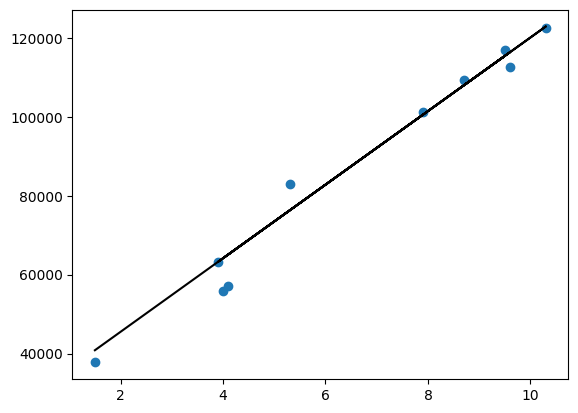

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
class linearRegression():
  def __init__(self,learning_rate,iterations,l2p):
    self.learning_rate=learning_rate
    self.iterations=iterations
    self.l2p=l2p
  def fit(self,X,Y):
    self.m,self.n=X.shape
    #print(Y.shape)

    self.W=np.zeros(self.n)
    self.b=0
    self.X = X
    self.Y = Y
    for i in range( self.iterations):
      self.update_weights()
    return self
  def update_weights(self):
          Y_pred= self.predict(self.X)
          dw=(-(2*self.X.T).dot(self.Y-Y_pred) + 2*self.l2p*self.W)/self.m
          db=-2*np.sum(self.Y-Y_pred) /self.m
          self.W=self.W-self.learning_rate*dw
          self.b=self.b-self.learning_rate*db
  def predict(self,X):
    return X.dot(self.W)+self.b
path="/content/drive/MyDrive/data/salary_data.csv"
df = pd.read_csv( path )
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state = 0 )
model=linearRegression(learning_rate=0.01,iterations=1000,l2p=1)
model.fit(X_train,Y_train)
Y_pred = model.predict( X_test )
print("real values\n",Y_test)
print("predicted valuese \n",Y_pred )
print(model.W[0],model.b)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='k')
plt.show()